In [ ]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras import Input
from keras.applications import MobileNetV2

# Project 2 - Veggie Classification

For this assignment you'll need to classify some images of vegetables.

## Deliverables

Please submit your files into Moodle as follows:
<ul>
<li> A zipped .h5 model that has been trained. See the notes towards the end of the file.
<li> Your .ipynb file.
<li> A note (~1 to 2 paragraphs) in the comments of Moodle noting what you did to improve accuracy beyond just making a model.
</ul>

### Grades

<ul>
<li> Accuracy - 60%
<li> Code - readable and logical - 20%
<li> Explainatory note - 20%
</ul>

## Load Training and Validation Data

Please download the zip file from moodle and place it into your folder. If running on Colab you'll need to load it into the workspace.

#### Colab and Files

You can load files into your Colab workspace via a drag and drop, however this file storage is temporary and will go away when you end your runtime. You can also use your Google drive to store it without having to load it multiple times - there are lots of guides online to setting this up.

#### Temporary Files

If there are temporary files generated anywhere in the image folders you will need to remove them or you will probably get weird errors. For example, on a Mac (which I'm using to make this), there are temporary files that start with "._". If these appear for you, you can clear them via:
<ul>
<li> Mac: open a terminal at the top level of the image folder and run "dot_clean -n ."
<li> Windows: open a command prompt at the top level of the image folder and run "find . -name "._*" -exec rm '{}' \; -print"
</ul>

If this doesn't work, or if there are any other temporary files created in your file system you can remove them any other way - e.g. use search to find the files and remove them, sort by filetype and delete, etc... The commands above are just shortcuts.

#### File Naming

Once things are unzipped ensure that the paths are correct and match your file paths.

#### Loading from Google Drive

You can also use an adaptation of the code below to load the file from your Google Drive if you're in Colab. You'll get some permission prompts if you haven't done this before.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/3950_Proj2_NN_Img"

LICENSE  README.md  start.ipynb  Vegetables  Vegetables.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/3950_Proj2_NN_Img/Vegetables.zip" "Vegetables.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# UNZIP - Ensure that the filename is correct
import zipfile

zip_name = "Vegetables.zip"

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
# Generate Datasets - you can change this if desired
# ENSURE FILE PATHS MATCH CORRECTLY
IMAGE_SIZE=(224,224)
train_dir='Vegetables/train'
val_dir='Vegetables/validation'

# Load training data
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    shuffle=True,
)

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
)

Found 10000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


In [ ]:
# Declare Size Variables - Needed for Compressing
batch_size = 64
train_samples = 10000
epochs = 5

#### Training and Validation Data

After the file has been unzipped and loaded into datasets, you should see:

Found 20000 files belonging to 10 classes.
Found 4000 files belonging to 10 classes.

The first is the training dataset, the second is the validation dataset.

In [ ]:
# Model 1- Custom CNN from scratch
#--------------------------------------------
# - using a rescaling layer to normalize pixel values from [0, 255] to [0,1]
# - three convolutional blocks:
#     -- Conv2D with 32 filters to capture low level features like texture using 3x3 kernels
#     -- Conv2D with 64 filters to capture more complicated patterns and experimenting with 5x5 kernels
#     -- Conv2D with 256 filters to capture even more complex features using 3x3 kernels
# - MaxPooling after eacg conv layer to reduce the dimension
# - flatten layer to convert the features into a flat 1D array
# - 2 fully connected dense layers for classification
# - a dropout layer to reeduce overfitting with a dropout rate of 0.3
# - a final dense layer with softmax activation for the 10 veggie outputs


#define the number of classes
num_classes = 10

model_1 = models.Sequential()

#input layer
model_1.add(Input(shape = (224, 224, 3), name='input_layer'))

#normalize the pixels
model_1.add(layers.Rescaling(1./255, name='rescale_input'))

#conv block 1 (using 32 filters and 3 x 3 kernel)
model_1.add(layers.Conv2D(32, (3,3), activation='relu', padding= 'same', name='conv_b_1'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2), name='pool_1'))

#conv block 2 - using 64 filters and experimenting with 5x5 kernel
model_1.add(layers.Conv2D(64, (5,5), activation='relu', padding= 'same', name='conv_b_2'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2), name='pool_2'))

#conv block 3 - using 256 filters and 3x3 kernels
model_1.add(layers.Conv2D(256, (3,3), activation='relu', padding= 'same', name='conv_b_3'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2), name='pool_3'))

#flatten and dense layers
# using a dropout rate of 0.3 instead of 0.5 to allow more neuron activity since
# dataset isn't that huge
model_1.add(layers.Flatten(name='flatten_features'))
model_1.add(layers.Dense(256, activation='relu', name="fully_connected_layer_1"))
model_1.add(layers.Dropout(0.3, name='dropout_layer_1'))
model_1.add(layers.Dense(64, activation='relu', name='fully_connected_layer_2'))
model_1.add(layers.Dropout(0.3, name='dropout_layer_2'))

#output layer
model_1.add(layers.Dense(num_classes, activation='softmax', name='output_layer'))

model_1.summary()

#Compile model 1

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# train model 1
history_1 = model_1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size
)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale_input (Rescaling)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_b_1 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_b_2 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_b_3 (Conv2D)               │ (None, 56, 56, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_features (Flatten)      │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_1 (Dense) │ (None, 256)            │    51,380,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_2 (Dense) │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,597,450 (196.83 MB)

 Trainable params: 51,597,450 (196.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.3173 - loss: 1.9554 - val_accuracy: 0.8110 - val_loss: 0.6389
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.7428 - loss: 0.7918 - val_accuracy: 0.8745 - val_loss: 0.4175
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.8481 - loss: 0.5016 - val_accuracy: 0.8830 - val_loss: 0.4280
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.8936 - loss: 0.3491 - val_accuracy: 0.9280 - val_loss: 0.2979
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.9166 - loss: 0.2777 - val_accuracy: 0.9305 - val_loss: 0.2601


### **PLOT THE ACCURACY AND LOSS OF MODEL 1**

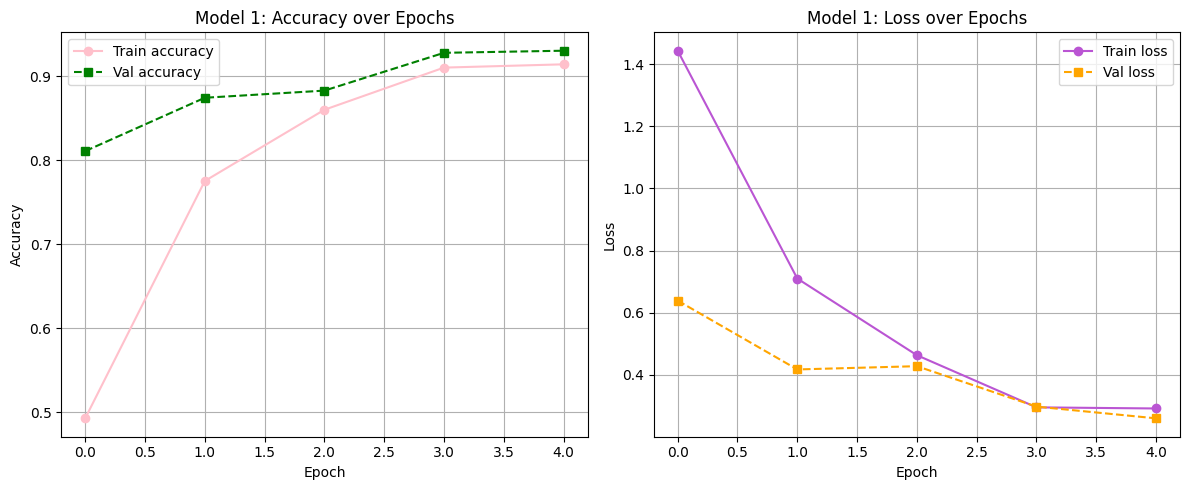

In [ ]:
#Plot the results of model 1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Accuracy plot
axes[0].plot(history_1.history['accuracy'], label='Train accuracy', color='pink', marker ='o')
axes[0].plot(history_1.history['val_accuracy'], label='Val accuracy', color='green', linestyle='--', marker='s')
axes[0].set_title('Model 1: Accuracy over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)


#Loss plot
axes[1].plot(history_1.history['loss'], label='Train loss', color='mediumorchid',marker ='o')
axes[1].plot(history_1.history['val_loss'], label='Val loss', color='orange', linestyle='--', marker='s')
axes[1].set_title('Model 1: Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Model 2- Transfer learning using MobileNetV2
#--------------------------------------------

num_classes=10

#create the base model from the pretrained model MobileNetV2
base_model= MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights = 'imagenet',
    pooling='avg'
)

base_model.trainable=False #freeze all the layers for now

#build the model
model_2 = models.Sequential()

#input layer
model_2.add(Input(shape = (224, 224, 3), name='input_layer'))

#add base model
model_2.add(base_model)

#droput & fully connected layers

model_2.add(layers.Dropout(0.3, name='droput_1'))

model_2.add(layers.Dense(128, activation='relu', name="fully_connected_layer_1"))
model_2.add(layers.Dropout(0.3, name='droput_2'))

model_2.add(layers.Dense(64, activation='relu', name="fully_connected_layer_2"))
model_2.add(layers.Dropout(0.3, name='droput_3'))

#output layer
model_2.add(layers.Dense(num_classes, activation='softmax', name='output_layer'))

print(model_2.summary())





Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ droput_1 (Dropout)              │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_1 (Dense) │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ droput_2 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_2 (Dense) │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ droput_3 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,858 (9.27 MB)

 Trainable params: 172,874 (675.29 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [ ]:
# compile model 2
model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train model 2
history_2 = model_2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.3017 - loss: 1.9751 - val_accuracy: 0.7190 - val_loss: 0.8741
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6284 - loss: 1.1012 - val_accuracy: 0.7945 - val_loss: 0.6356
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7255 - loss: 0.8437 - val_accuracy: 0.8590 - val_loss: 0.4762
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7541 - loss: 0.7411 - val_accuracy: 0.8715 - val_loss: 0.4331
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7857 - loss: 0.6633 - val_accuracy: 0.8865 - val_loss: 0.3725


In [ ]:
#accuracy is not great
#- unfreeze base model for fine tuning
base_model.trainable=True

#try recompiling the model with a lower learning rate
model_2.compile(
    optimizer=keras.optimizers.Adam(1e-5), #to avoid ruining pre-trained weights
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#train for more epochs
history_2_finetune = model_2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 201ms/step - accuracy: 0.9736 - loss: 0.0866 - val_accuracy: 0.9955 - val_loss: 0.0131
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.9832 - loss: 0.0565 - val_accuracy: 0.9965 - val_loss: 0.0087
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.9881 - loss: 0.0386 - val_accuracy: 0.9960 - val_loss: 0.0076
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.9910 - loss: 0.0311 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.9925 - loss: 0.0255 - val_accuracy: 0.9990 - val_loss: 0.0033


### **PLOT THE ACCURACY AND LOSS OF MODEL 2 (TRANSFER LEARNING VIA MobileNetV2)**

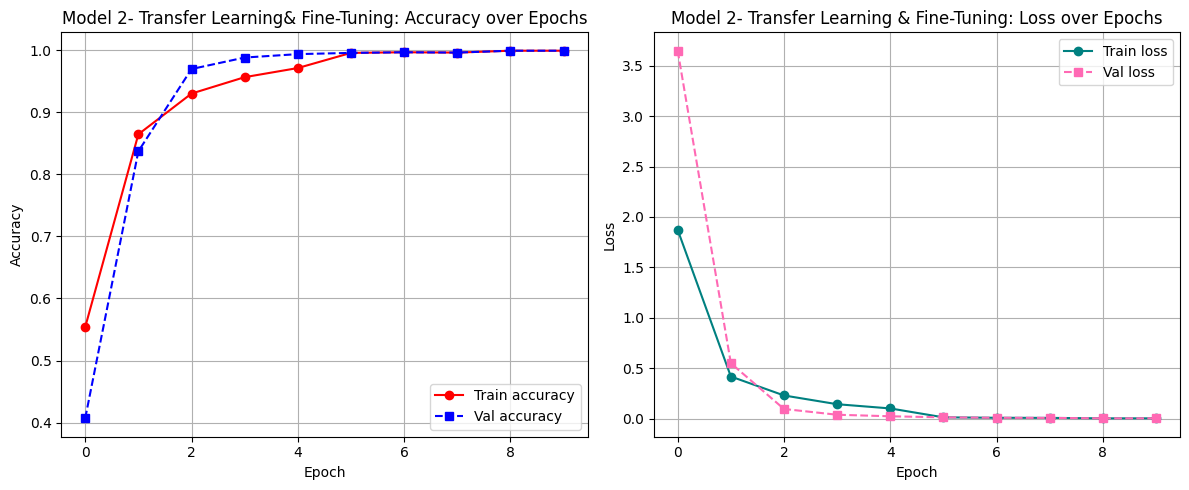

In [ ]:
#Plot the results of model 2
#combine metrics across both training phases

acc=history_2.history['accuracy']+history_2_finetune.history['val_accuracy']
val_acc=history_2.history['val_accuracy']+history_2_finetune.history['val_accuracy']

loss=history_2.history['loss']+history_2_finetune.history['val_loss']
val_loss=history_2.history['val_loss']+history_2_finetune.history['val_loss']



fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Accuracy plot
axes[0].plot(acc, label='Train accuracy', color='red', marker ='o')
axes[0].plot(val_acc, label='Val accuracy', color='blue', linestyle='--', marker='s')
axes[0].set_title('Model 2- Transfer Learning& Fine-Tuning: Accuracy over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)


#Loss plot
axes[1].plot(loss, label='Train loss', color='teal',marker ='o')
axes[1].plot(val_loss, label='Val loss', color='hotpink', linestyle='--', marker='s')
axes[1].set_title('Model 2- Transfer Learning & Fine-Tuning: Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## **What was done to improve accuracy**
  - Initially froze the base model and trained it using dense layers (128 and 64 units) and dropout of 0.3. In the first training phase with the base model frozen the model reached an accuracy of 78.57% and a validation accuracy of 88.65% by epoch 5 with a training loss of 0.6633 and validation loss of 0.3725.
  
  - To improve accuracy we unfroze the base MobileNetV2 model, added 5 more epochs of training and fine-tuned all layers using a lower learning rate of (1e-5). The result was a significant improvement, it reached a final training accuracy of 99.25%, validation accuracy of 99.90% reducing loss to 0.0255(train) and 0.0033 (validation). So, fine tuning improved accuracy and the model's ability to generalize well as shown by the low validayion loss value.

# NOTE - HOLD ON FINAL SUBMISSION STUFF
## I NEED TO ENSURE THAT THERE'S NO CHANCE OF ANYONE EXCEEDING SIZE LIMITS OF MOODLE

### Compress and Save Model

For this you have a hard upper limit for model size of 400mb. Why? This is the largest that Moodle can accept, and I do not have any way to work around that.

The model will probably need to be pruned to be smaller, then compressed as a zip. In testing this the size can very by a lot, pruning and compressing can get it down to less than 100mb. The size of yours does not matter, as long as it is small enough.

In [ ]:
final_model=model_2

#save the final fine-tuned model no pruning
final_model.save("final_model.h5")

#zip the model to reduce size
!zip -r final_model.zip final_model.h5

#check if size is within requirement > 400 mb

!du -h final_model.h5

  adding: final_model.h5 (deflated 9%)
29M	final_model.h5


For the final model we chose not to apply pruning given in the code below. With our model 2 setup the pruning setup caused type-related errors as it was incompatible with the current structure. Instead we saved the fully trained model, zipped it to reduce the size. We then confirmed that the size limit is 29MB (well under the 400mb limit)

In [ ]:
!pip install tensorflow_model_optimization
import tensorflow_model_optimization as tfmot

end_step = np.ceil(1.0 * train_samples / batch_size).astype(np.int32) * epochs
print(end_step)

new_pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=100)
}

new_pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, **new_pruning_params)
new_pruned_model.summary()

new_pruned_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
logdir = "logs"
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir=logdir, profile_batch=0)
]

new_pruned_model.fit(train_ds,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=val_ds)

In [ ]:
final_model = tfmot.sparsity.keras.strip_pruning(new_pruned_model)
final_model.save("final.h5")
final_model.summary()